<a href="https://colab.research.google.com/github/BAHAMLAOUHI/NLP/blob/main/Sentiment%20Analysis/Sentiment_Analysis_using_TextBlob_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns



In [2]:
df = pd.read_csv('reviews.csv')
df.head()

,Id,Review,Label
0,0,good and interesting,5
1,1,"This class is very helpful to me. Currently, I...",5
2,2,like!Prof and TAs are helpful and the discussi...,5
3,3,Easy to follow and includes a lot basic and im...,5
4,4,Really nice teacher!I could got the point eazl...,4


In [3]:
df.shape

(107018, 3)

In [4]:
df['Review'].values[10]

"Is there any reason why you should not apply the course by BCG?)It's content is pretty unique and includes a high level analysis and a wide range of knowledge needed to cover all detailed aspects.Best regards,Oleg Serov"

In [5]:
df['Label'].value_counts()

,count
Label,
5,79173
4,18054
3,5071
1,2469
2,2251


Text(0, 0.5, 'Frequency')

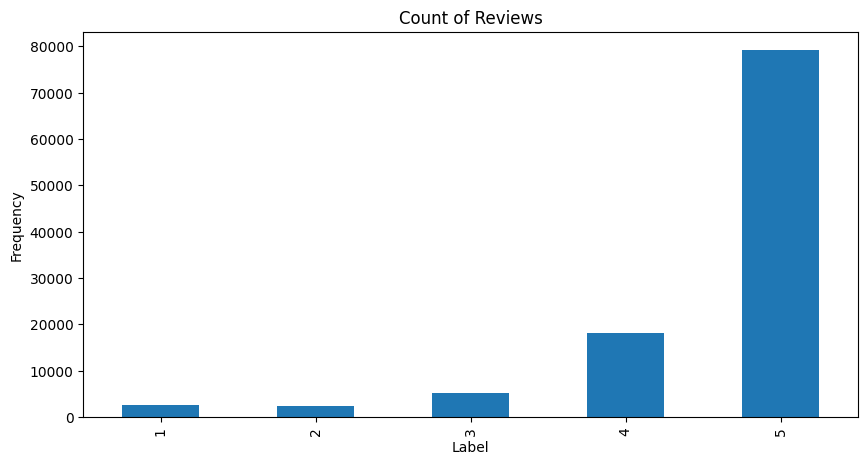

In [6]:
df['Label'].value_counts().sort_index().plot(kind='bar', title='Count of Reviews', figsize=(10, 5)  )
plt.xlabel('Label')
plt.ylabel('Frequency')

In [7]:
example=df['Review'].values[30]
print(example)

Well-presented contents with comprehensive illustrations and easy to follow, cover in proper order every aspect of drawing and AutoCAD. Would appreciate if the English subtitle is available in the whole course, so more students could access to these handy lectures and exercises.


In [8]:
df.isnull().sum()

,0
Id,0
Review,0
Label,0


In [9]:
df.duplicated().sum()

0

# TexTBlob


In [22]:
!pip install textblob

In [23]:
from textblob import TextBlob

In [24]:
result = TextBlob(example)

In [26]:
result.sentiment

Sentiment(polarity=0.30476190476190473, subjectivity=0.44761904761904764)

In [27]:
TextBlob('I love this product').sentiment

Sentiment(polarity=0.5, subjectivity=0.6)

In [28]:
TextBlob('I hate this product').sentiment

Sentiment(polarity=-0.8, subjectivity=0.9)

 The polarity score is a float within the range [-1.0, 1.0]. The subjectivity is a float within the range [0.0, 1.0] where 0.0 is very objective and 1.0 is very subjective.

In [29]:
# TextBlob Sentiment Analysis
text_blob_analysis = TextBlob(example)
text_blob_polarity = text_blob_analysis.sentiment.polarity
text_blob_sentiment = 'positive' if text_blob_polarity > 0 else 'negative' if text_blob_polarity < 0 else 'neutral'

print(f"TextBlob Sentiment: {text_blob_sentiment} (Polarity: {text_blob_polarity})")


TextBlob Sentiment: positive (Polarity: 0.30476190476190473)


In [32]:
new_rows = []
for index, row in df.iterrows():
  review = row['Review']
  sentiment_scores = TextBlob(review).sentiment
  new_rows.append({'Id': index, 'polarity': sentiment_scores.polarity, 'subjectivity': sentiment_scores.subjectivity})
new_df = pd.DataFrame(new_rows)


In [33]:
new_df.head()

,Id,polarity,subjectivity
0,0,0.600000,0.550000
1,1,0.066667,0.275000
2,2,0.339583,0.800000
3,3,0.277778,0.652778
4,4,0.600000,1.000000


In [35]:
txtblob=new_df.merge(df,how='left')
txtblob.head()

,Id,polarity,subjectivity,Review,Label
0,0,0.600000,0.550000,good and interesting,5
1,1,0.066667,0.275000,"This class is very helpful to me. Currently, I...",5
2,2,0.339583,0.800000,like!Prof and TAs are helpful and the discussi...,5
3,3,0.277778,0.652778,Easy to follow and includes a lot basic and im...,5
4,4,0.600000,1.000000,Really nice teacher!I could got the point eazl...,4


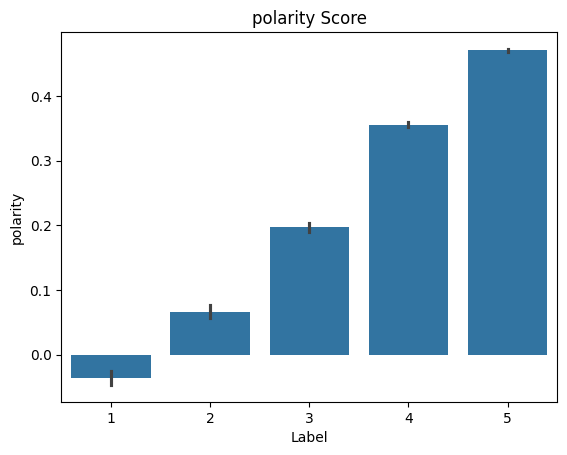

In [37]:
ax=sns.barplot(data=txtblob, x='Label', y='polarity')
ax.set_title('polarity Score')
plt.show()


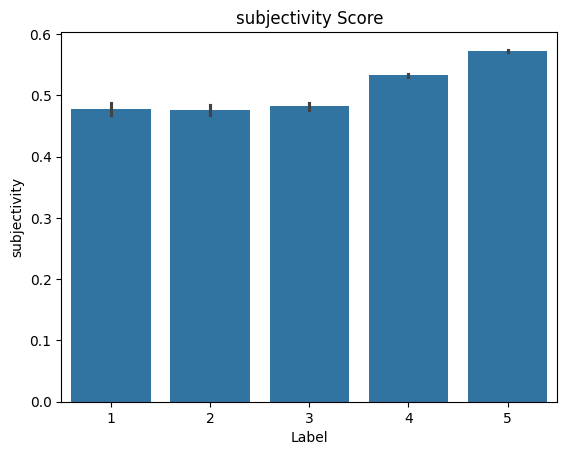

In [38]:
ax=sns.barplot(data=txtblob, x='Label', y='subjectivity')
ax.set_title('subjectivity Score')
plt.show()